# Exercício 5.5 - Levenspiel

Enunciado:

<blockquote>
    Uma alimentação aquosa de A e B (400 L/min, 100 mmols de A/L e 200 mmols de B/L) deve ser convertida em produto em um reator pistonado (PFR). A cinética da reação é representada por:

$$ A + B \rightarrow R \,\,\,\,\, -r_A = 200C_AC_B\,mol.L^{-1}.min^{-1} $$

<blockquote>
    Encontre o volume necessário do reator para converter 99,9% de A em produto.

### Teoria
---

Bom, o problema é relativamente simples: precisamos achar o volume do PFR que fornece uma conversão de 99,9% (0.999), sabendo as concentrações de entrada dos dois reagentes e a taxa de reação.

Vamos assumir, no balanço material, que:

* Não há acúmulo no reator, por isso, ele opera em **estado estacionário**;
* Num determinado instante $t$, as quantidades de A e B convertidas são **iguais** à $C_{A0}X_A$

Isso leva ao seguinte equacionamento:

$$ F_{A} - (F_A + dF_{A}) + (-r_A)dV = 0 $$

Rearranjando:

$$ dF_A = d[F_{A0}(1 - X_A)] = (-r_A)dV \therefore -F_{A0}dXA = - (-r_A)dV $$

O que precisamos fazer é, então, integrar a expressão anterior para obtermos uma lista de volumes e conversões para essas condições e achar o volume que mais se aproxima de uma conversão de 99,9%.

Para que a taxa de reação fique dependente da conversão, podemos reescrevê-la considerando que $C_A = C_{A0}(1-X_A)$, $C_B = C_{B0}X_A$ e $F_{A0} = C_{A0}\cdot F$:

$$ (-r_A) = 200.0C_{A0}C_{B0}(X_A - X_A^2) $$

Portanto, a equação que vamos resolver, no fim das contas, é:

$$ \frac{dXA}{(-r_A)} = \frac{dV}{C_{A0}F} $$

Essa equação não precisa ser integrada numericamente - uma simples separação de variáveis já resolve nosso problema. Entretanto, usaremos aqui o pacote `odeint` para integrá-la numericamente (você pode, inclusive, comparar a resposta com a resposta obtida se a integração fosse feita de maneira 'manual').

### Implementação
---

Vamos começar chamando alguns pacotes:

* **scipy.integrate**, para integração entre dois pontos;
* **Numpy**, para álgebra;
* **Pandas**, para trabalhar melhor com tabelas;
* **Matplotlib.pyplot**, para plotar a solução

In [89]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

Primeiramente, vamos definir os parâmetros necessários (fornecidos no enunciado):

In [38]:
F = 400.0 #L/min, vazão de entrada;
CA0 = 0.1 #mol/L, concentração inicial de A;
CB0 = 0.2 #mol/L, concentração inicial de B;

Vamos definir agora uma *função* para fazer a integração. Vamos chamá-la de *PFR*, e ela receberá como argumentos os valores de $C_A$, $C_B$ e do volume (V) do reator:

In [41]:
def PFR(XA, V):
    r_A = 200.0*CA0*CB0*(XA - XA**2)
    dXAdV = r_A / (CA0 * F)
    return dXAdV

Agora, podemos definir os chutes iniciais das conversões e um vetor para os volumes que serão computados e fazer a integração:

In [84]:
XA0 = 0.001 #Chute inicial para a conversão de A. Vamos deixar o mais perto possível da conversão que dejamos (0.999)

V = np.arange(0.0, 200.0, 0.1) #Vetor para os volumes, variando de 0,0 a 200,0 L, de 0,1 em 0,1 L.

Y = odeint(PFR, XA0, V)

Vamos converter o vetor de respostas para um DataFrame, usando o pacote **Pandas**. Assim:

In [85]:
Y = pd.DataFrame(Y, columns=['XA'])
Y['Volume'] = V

In [86]:
Y

,XA,Volume
0,0.001000,0.0
1,0.001010,0.1
2,0.001020,0.2
3,0.001030,0.3
4,0.001041,0.4
...,...,...
1995,0.999998,199.5
1996,0.999998,199.6
1997,0.999998,199.7
1998,0.999998,199.8


O que podemos fazer agora é encontrar o volume do PFR que corresponde à uma conversão de 99,9%. Repare: numa integração numérica, podemos não ter exatamente o valor 0.999 para a conversão, por isso, iremos procurar o *valor mais próximo*. Podemos fazer isso usando um *boolean* no DataFrame Y, da seguinte forma:

In [87]:
Vol = Y['Volume'].loc[(Y['XA']-0.999).abs().argsort()[:1]].values[0]

In [88]:
print('Volume do PFR: %0.1f' % Vol, 'L')

Volume do PFR: 138.1 L


Que tal vermos como a conversão varia com o volume do PFR?

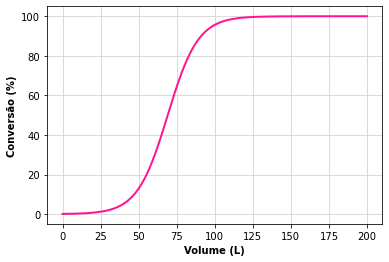

In [97]:
plt.plot(V, Y['XA']*100.0, linewidth = 2.0, color = 'deeppink')
plt.xlabel('Volume (L)', fontweight = 'bold')
plt.ylabel('Conversão (%)', fontweight = 'bold')
plt.grid(True, which = 'both', color = 'lightgray')
plt.show()